# Parkinsons Disease Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/GUVI/project4/parkinsons.csv")  
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [4]:
pd.set_option('display.max_columns', None) 

## Data preprocessing and cleaning

In [5]:
df.shape

(195, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
df.columns.tolist()

['name',
 'MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [9]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [10]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [11]:
df.isnull().sum().sum()

np.int64(0)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['name'].nunique()

195

In [14]:
# Automatically detect numeric columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("numeric_features:", numeric_features )

# Automatically detect categorical columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("categorical_features:", categorical_features )

numeric_features: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
categorical_features: ['name']


### EDA

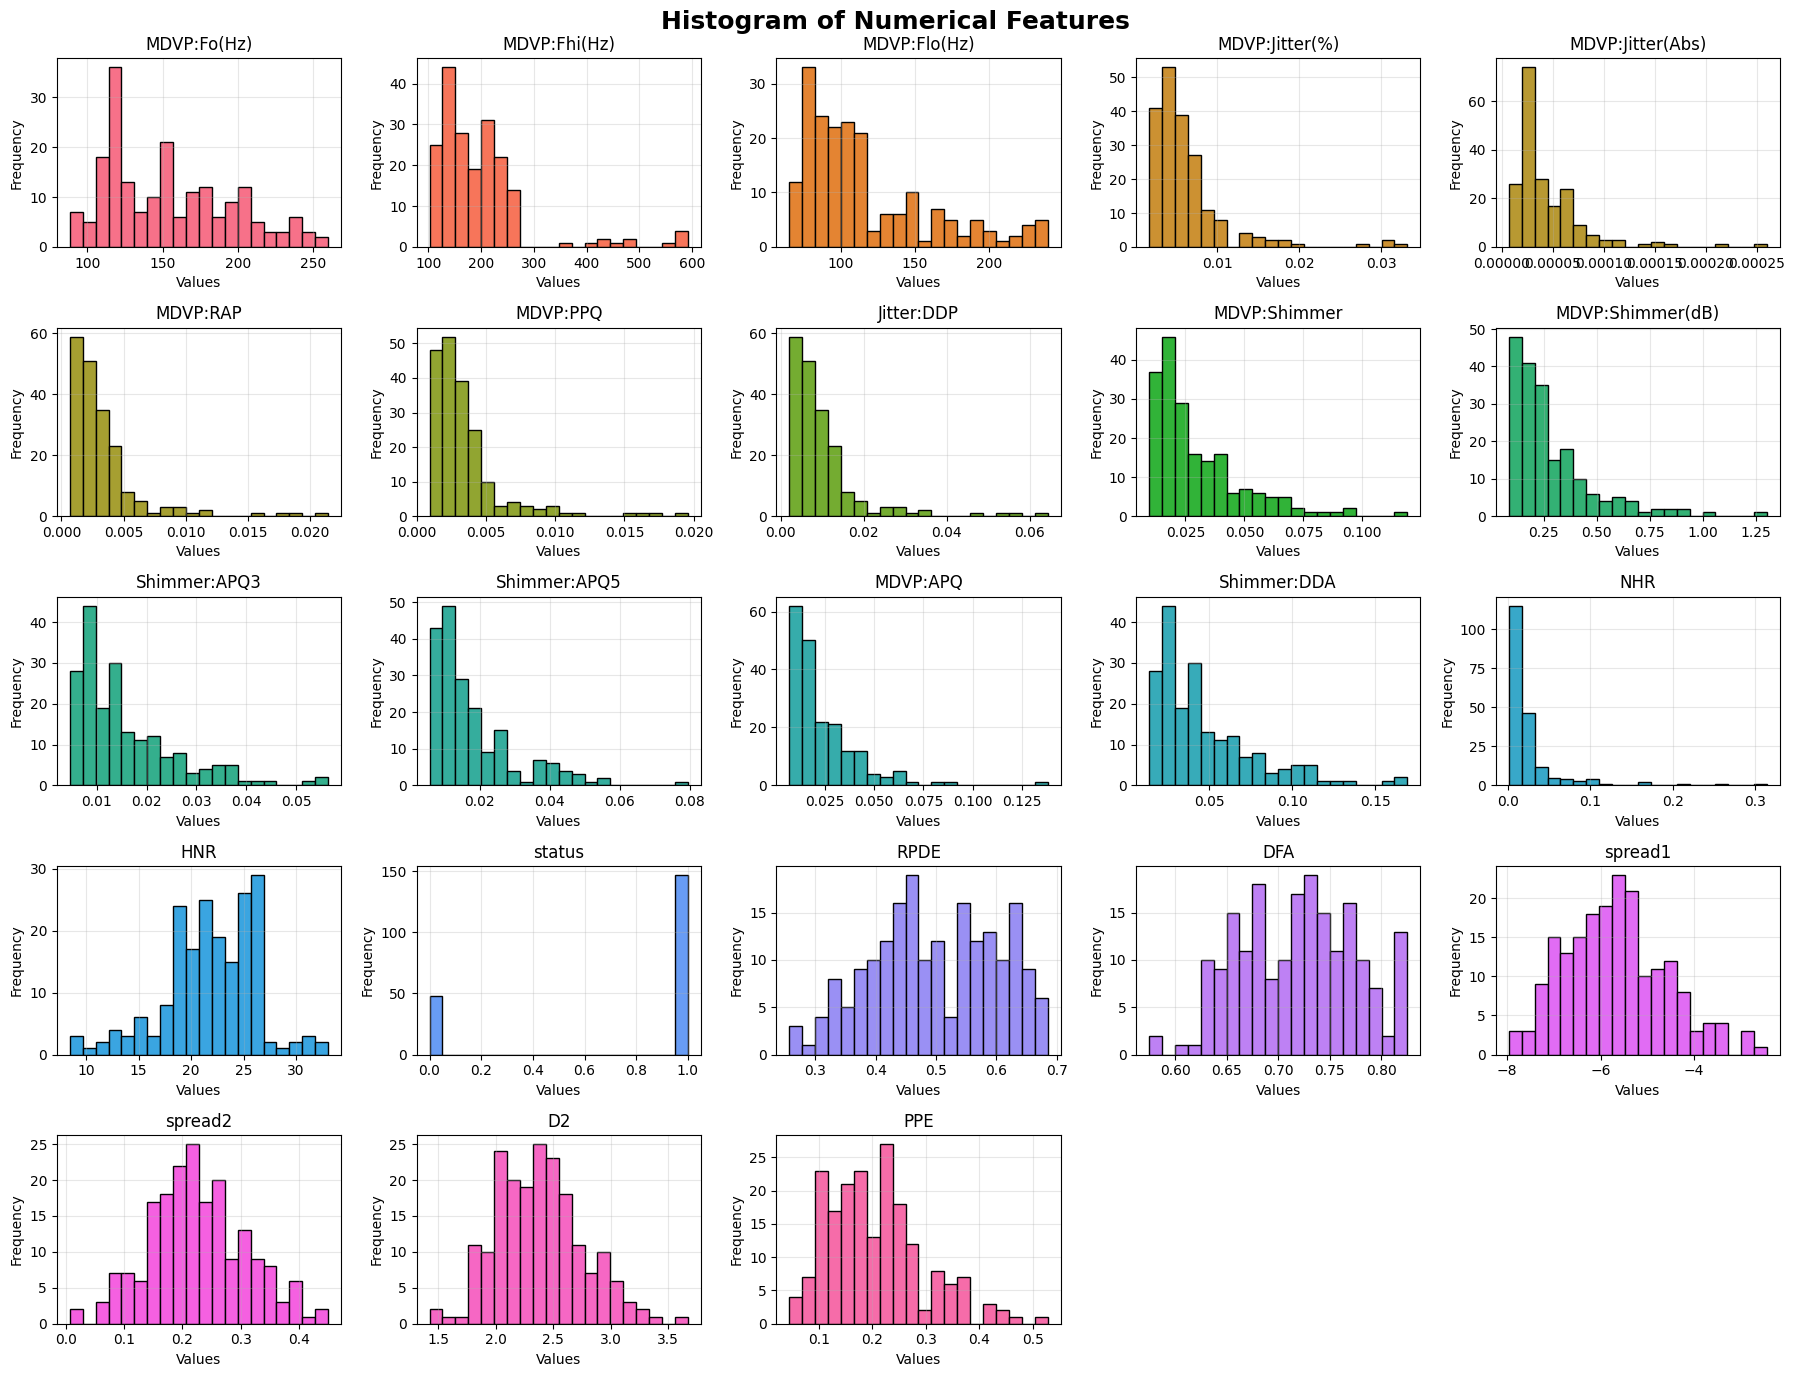

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a color palette with unique colors
colors = sns.color_palette("husl", len(numeric_features))

# 5x5 grid = 25 plots (good for 23 numeric features)
fig, axes = plt.subplots(5, 5, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    axes[i].hist(df[col].dropna(), bins=20, color=colors[i], edgecolor='black')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(alpha=0.3)

# Remove unused subplots (remove 23 → 24, 25)
for j in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Histogram of Numerical Features", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


In [16]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

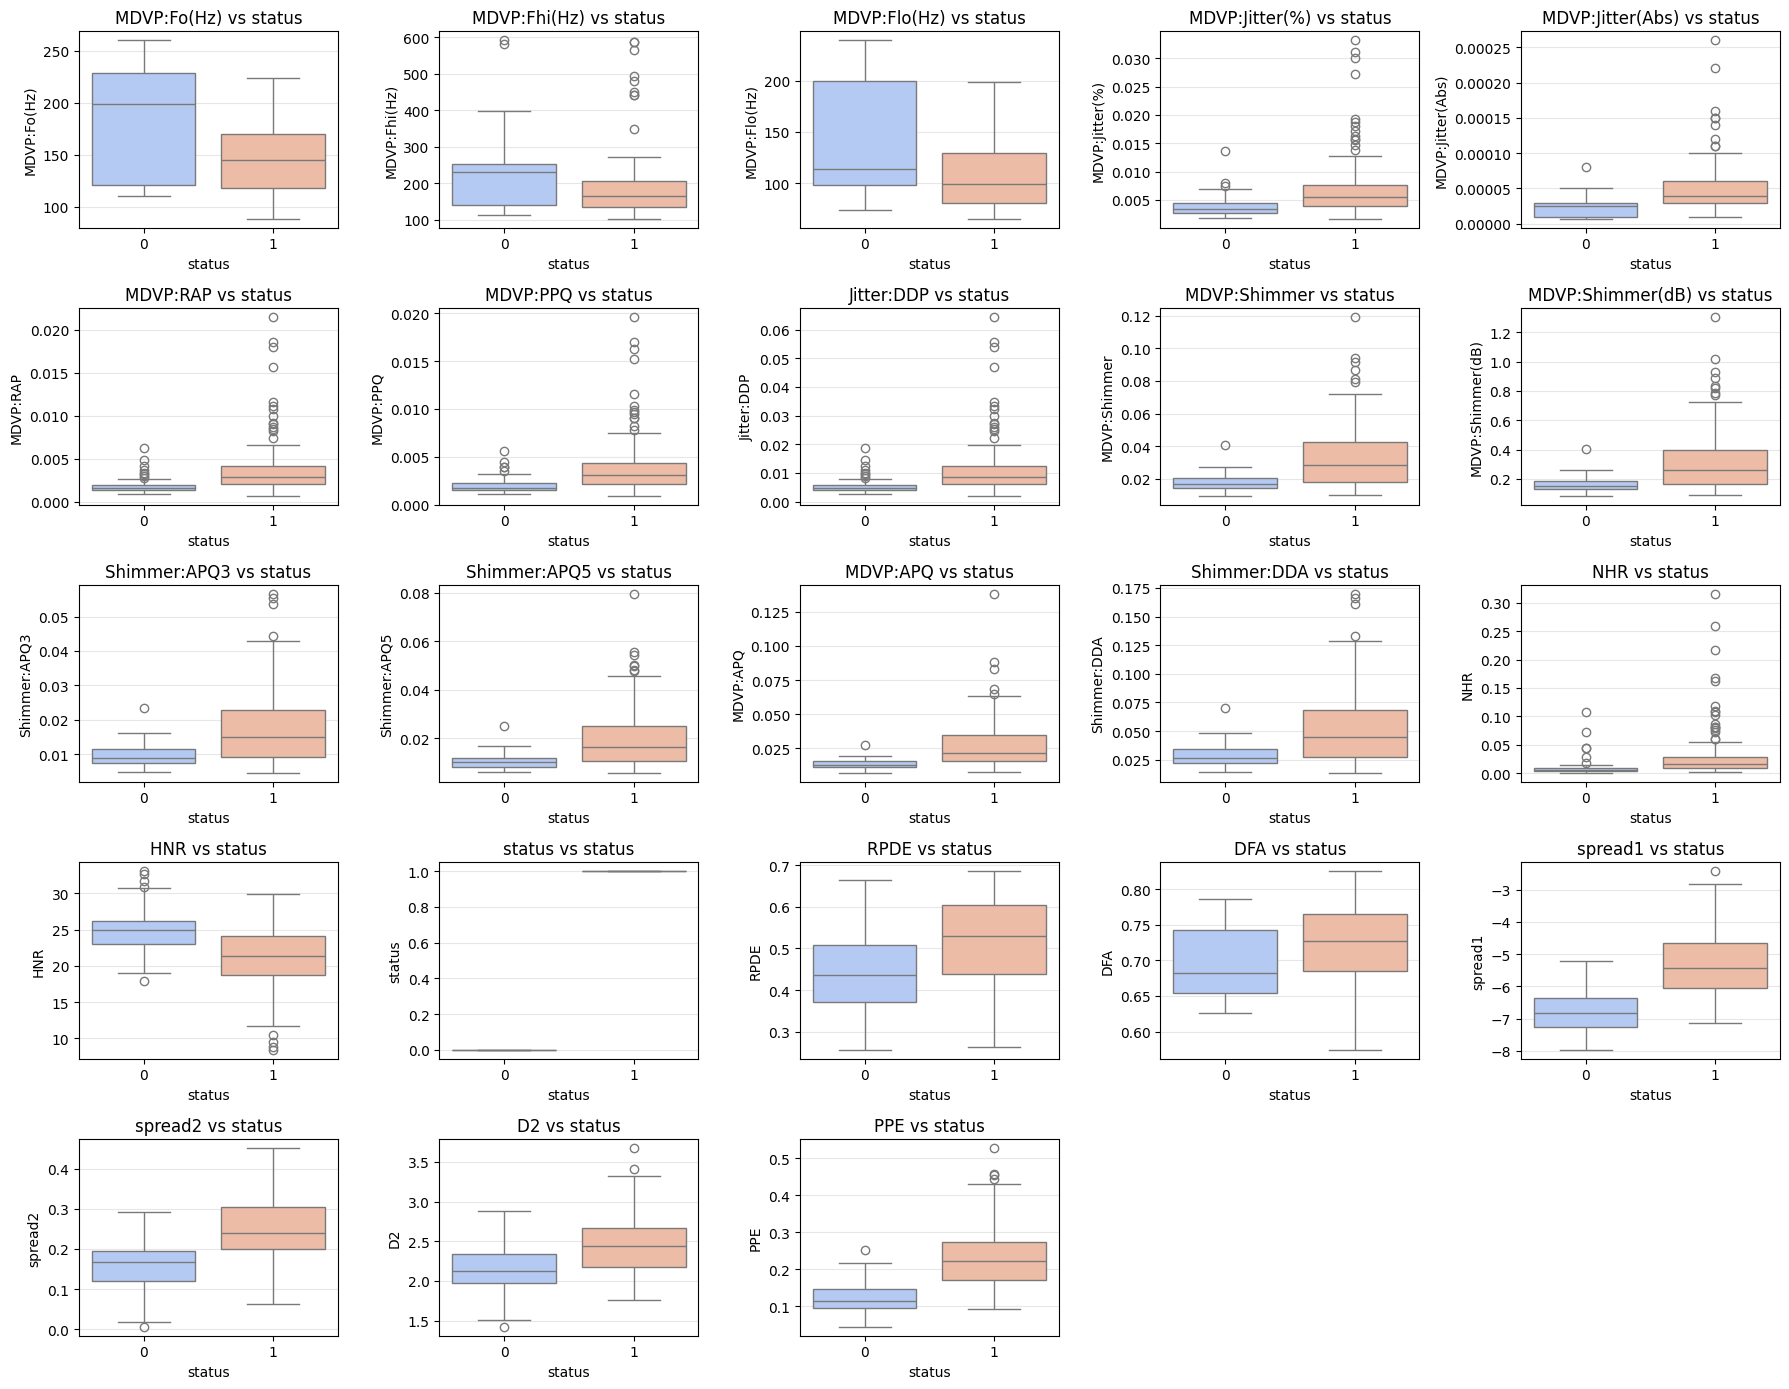

In [17]:
rows = 5
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(numeric_features):

    sns.boxplot(
        data=df,
        x='status',
        y=col,
        hue='status',    # Required for Seaborn future versions
        palette='coolwarm',
        ax=axes[i],
        dodge=False,
        legend=False             # Avoid repeated legends
    )

    axes[i].set_title(f"{col} vs status", fontsize=12)
    axes[i].grid(axis='y', alpha=0.3)

# Remove empty subplots
for j in range(len(numeric_features), rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


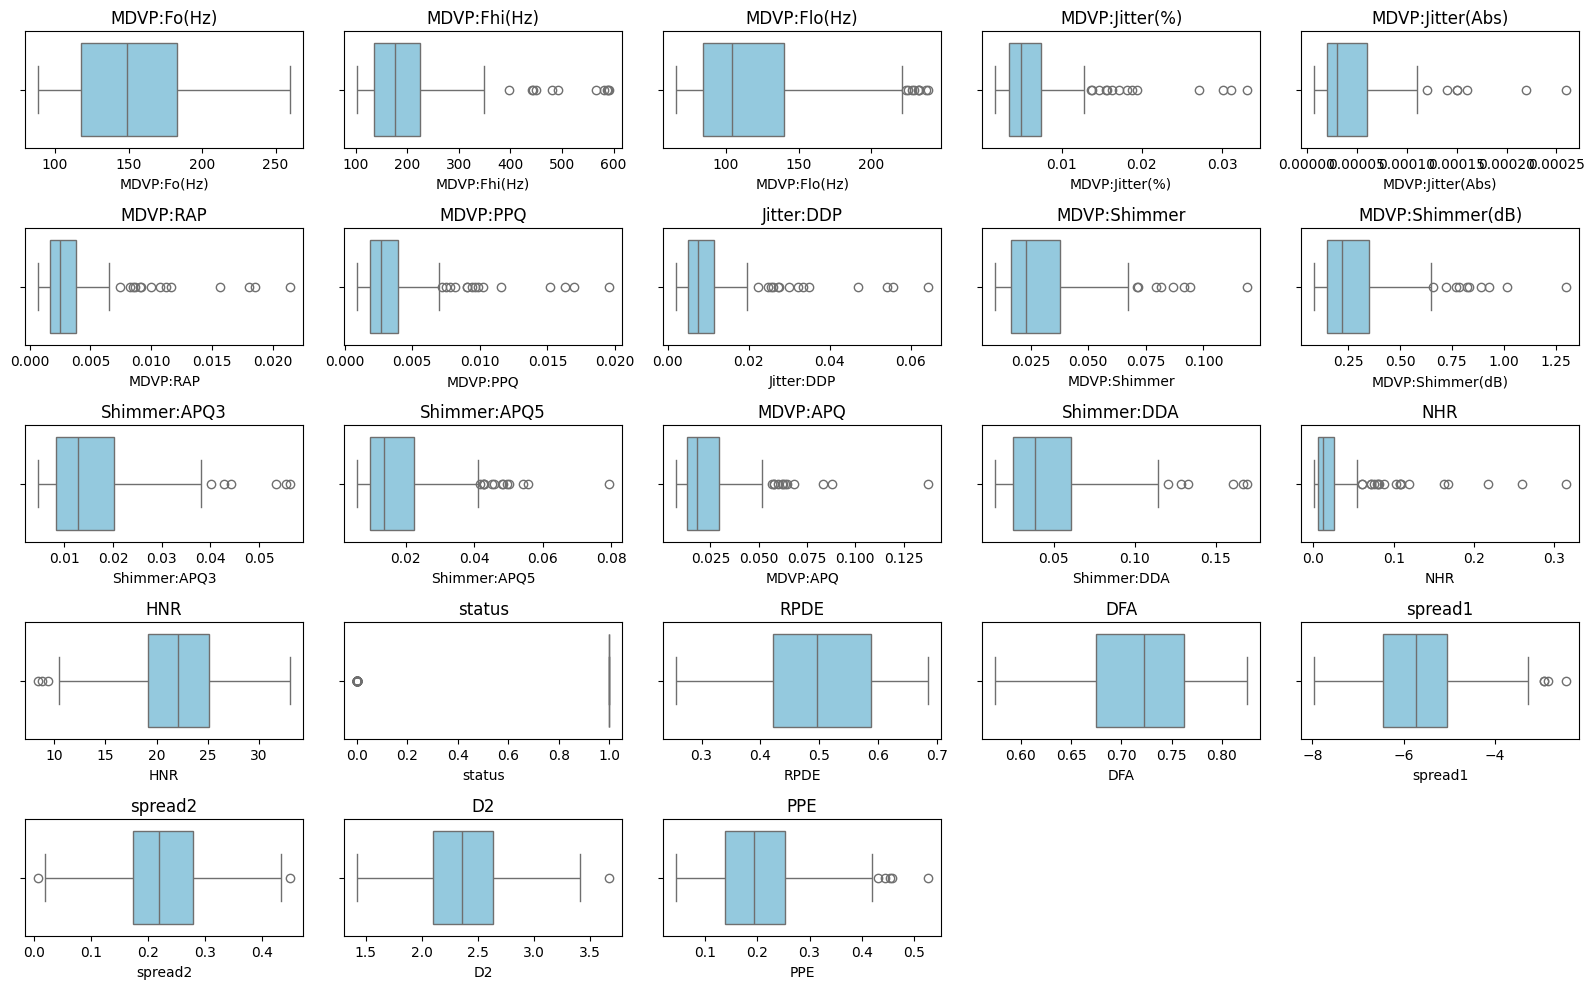

In [18]:
plt.figure(figsize=(16,10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


In [19]:
outlier_columns = []
outlier_summary = {}

for col in numeric_features:
    Q1 = df[col].quantile(0.05)
    Q3 = df[col].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_summary[col] =  {
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Num_Outliers': len(outliers)
    }

outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)

                  Lower_Bound  Upper_Bound  Num_Outliers
MDVP:Fo(Hz)       -100.063950   438.450850           0.0
MDVP:Fhi(Hz)      -326.412700   852.871300           0.0
MDVP:Flo(Hz)      -157.926350   447.067650           0.0
MDVP:Jitter(%)      -0.017814     0.035586           0.0
MDVP:Jitter(Abs)    -0.000125     0.000235           1.0
MDVP:RAP            -0.010339     0.020213           1.0
MDVP:PPQ            -0.010337     0.020735           0.0
Jitter:DDP          -0.031021     0.060646           1.0
MDVP:Shimmer        -0.072856     0.151323           0.0
MDVP:Shimmer(dB)    -0.724550     1.479050           0.0
Shimmer:APQ3        -0.040920     0.082515           0.0
Shimmer:APQ5        -0.048094     0.097178           0.0
MDVP:APQ            -0.063792     0.130624           1.0
Shimmer:DDA         -0.122749     0.247534           0.0
NHR                 -0.131746     0.226318           2.0
HNR                 -6.751800    47.209800           0.0
status              -1.500000  

In [20]:
import numpy as np

cols_to_cap = ['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',  'spread1', 'spread2', 'D2', 'PPE']

for col in cols_to_cap:
    lower = df[col].quantile(0.05)   # 5th percentile
    upper = df[col].quantile(0.95)   # 95th percentile
    
    # winsorization (cap both sides)
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

print("Capping completed for lower & upper outliers!")


Capping completed for lower & upper outliers!


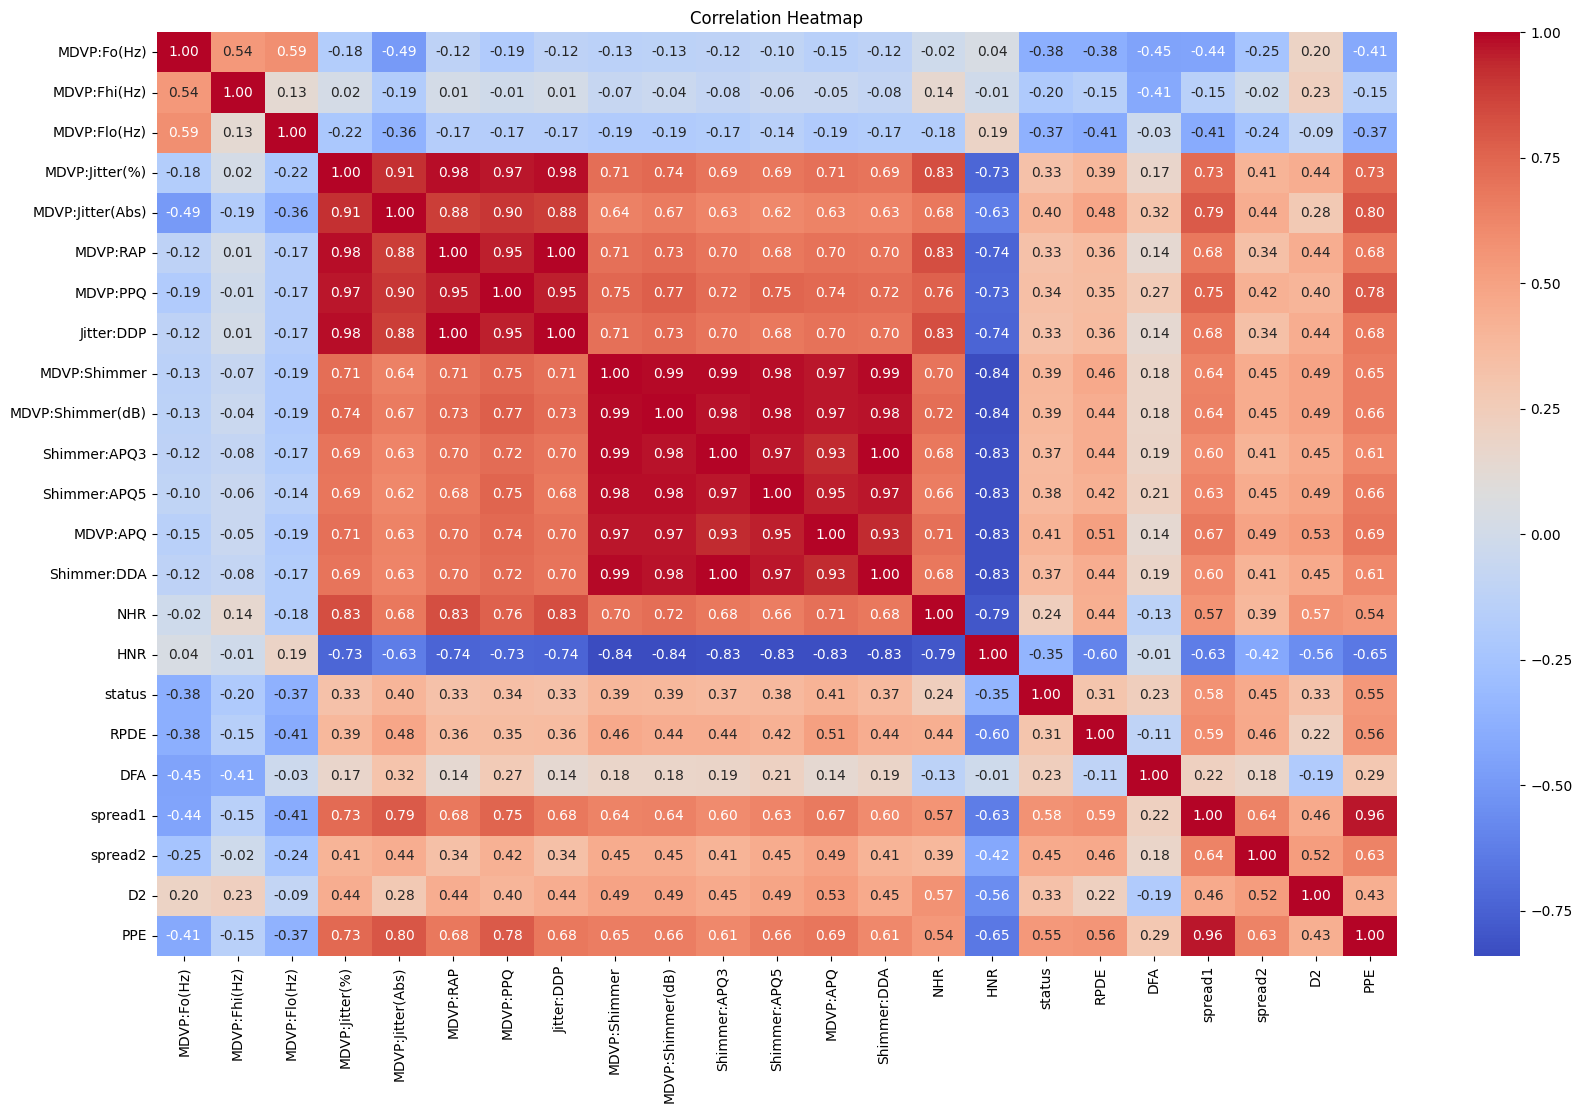

Correlation of features with  status:
status              1.000000
spread1             0.575554
PPE                 0.546728
spread2             0.454371
MDVP:APQ            0.414342
MDVP:Jitter(Abs)    0.402756
MDVP:Shimmer        0.393783
MDVP:Shimmer(dB)    0.387451
Shimmer:APQ5        0.375279
Shimmer:APQ3        0.369291
Shimmer:DDA         0.369281
MDVP:PPQ            0.341903
MDVP:Jitter(%)      0.331168
D2                  0.330547
MDVP:RAP            0.328339
Jitter:DDP          0.328320
RPDE                0.308567
NHR                 0.236693
DFA                 0.231739
MDVP:Fhi(Hz)       -0.200071
HNR                -0.348281
MDVP:Flo(Hz)       -0.370595
MDVP:Fo(Hz)        -0.383535
Name: status, dtype: float64


In [21]:
# Now compute correlation
df_numeric = df.select_dtypes(include='number')

plt.figure(figsize=(20,12))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print("Correlation of features with  status:")
print(df_numeric.corr()['status'].sort_values(ascending=False))


In [22]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

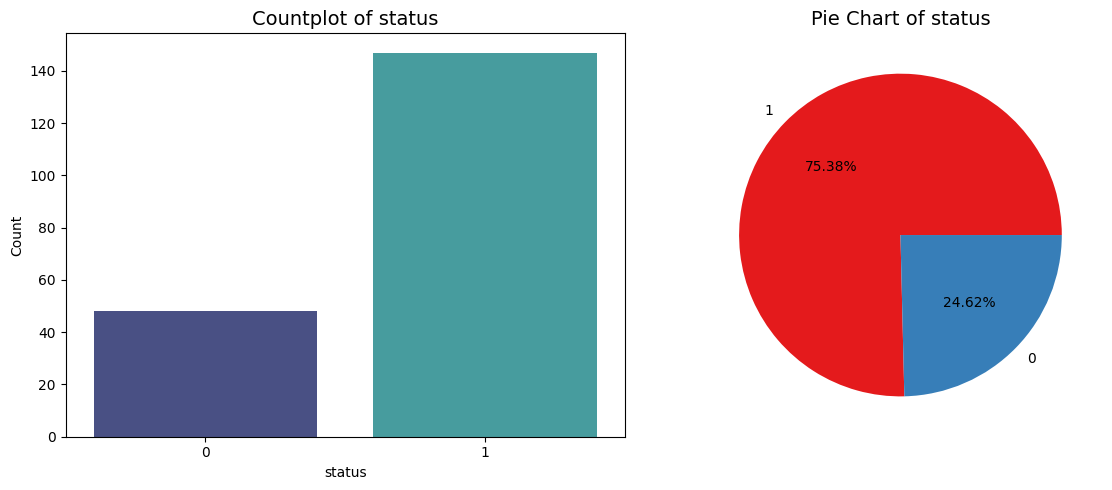

In [23]:
# Countplot and Piechart for status 

categorical_cols = ['status']  # you can add more categorical columns here
#palettes = ['mako', 'rocket', 'crest', 'viridis', 'coolwarm']  # new palette choices
palettes=[ "Spectral",
    "Set1",
    "Set2",
    "Set3",
    "hsv"]

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Countplot with a new color from palette
count_colors = sns.color_palette(palettes[0], n_colors=df['status'].nunique())
sns.countplot(
    x='status',
    hue='status',  # explicitly assign hue
    data=df,
    palette='mako',
    legend=False,     # optional, hides duplicate legend
    ax=axes[0]
)

axes[0].set_title('Countplot of status', fontsize=14)
axes[0].set_xlabel('status')
axes[0].set_ylabel('Count')

# Pie chart with a different palette
pie_colors = sns.color_palette(palettes[1], n_colors=df['status'].nunique())
df['status'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    colors=pie_colors,
    ax=axes[1]
)
axes[1].set_ylabel('')
axes[1].set_title('Pie Chart of status', fontsize=14)

plt.tight_layout()
plt.show()


In [24]:
df.to_csv('D:/GUVI/project4/parkinsons_disease_cleaned.csv', index=False)


## Machine learning model development

Predict the Parkinson's disease

Target variable - status

In [25]:
# Load dataset
# ---------------------------
df = pd.read_csv('D:/GUVI/project4/parkinsons_disease_cleaned.csv')

In [26]:
from sklearn.model_selection import train_test_split
# Feature & target
# ---------------------------
Feature_Names = [
    'spread1', 'PPE', 'spread2', 'MDVP:Shimmer', 'MDVP:APQ', 'MDVP:Jitter(Abs)',
    'Shimmer:APQ5', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',  'Shimmer:DDA',  'MDVP:PPQ', 'D2'
]

X = df[Feature_Names].copy()
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)


In [27]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns


In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


In [29]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', None)  # placeholder
])


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Custom scoring dictionary
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

results = []

for name, model in models.items():
    pipeline.set_params(model=model)

    scores = {}
    for metric_name, metric in scoring.items():
        score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=metric).mean()
        scores[metric_name] = score
    
    results.append([
        name,
        scores['accuracy'],
        scores['precision'],
        scores['recall'],
        scores['f1'],
        scores['roc_auc']
    ])

df_results = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]
)

print(df_results)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.833468   0.943680  0.831159  0.883232  0.908864
1        Random Forest  0.846371   0.919470  0.881884  0.905813  0.921335
2                  SVM  0.807661   0.932857  0.805072  0.864026  0.904943
3                  KNN  0.826613   0.949922  0.813406  0.874113  0.908191
4              XGBoost  0.871573   0.929578  0.898188  0.913200  0.935177


Accuracy Score: 0.8974358974358975

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39


Confusion Matrix (raw numbers):
 [[ 9  1]
 [ 3 26]]

Detailed Confusion Matrix:
True Negative (TN): 9
False Positive (FP): 1
False Negative (FN): 3
True Positive (TP): 26


<Figure size 600x400 with 0 Axes>

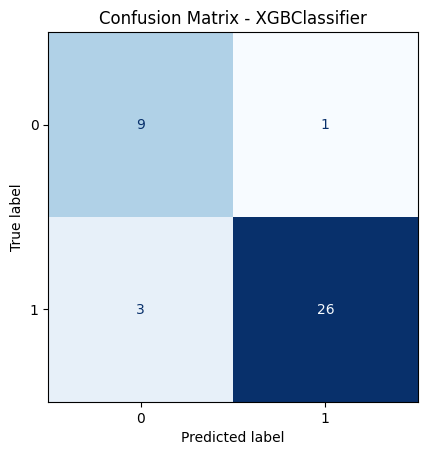

In [32]:
pipeline.set_params(model=XGBClassifier())
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    ConfusionMatrixDisplay
)

# --- Accuracy ---
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)


# --- Classification report ---
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



# --- Confusion Matrix (numeric) ---
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (raw numbers):\n", cm)

# --- Detailed Confusion Matrix with labels ---
tn, fp, fn, tp = cm.ravel()

print("\nDetailed Confusion Matrix:")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

# --- Pretty plotted Confusion Matrix ---
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1"])
plt.figure(figsize=(6,4))
disp.plot(cmap="Blues", colorbar=False)
plt.title("Confusion Matrix - XGBClassifier")
plt.show()



AUROC: 0.9552


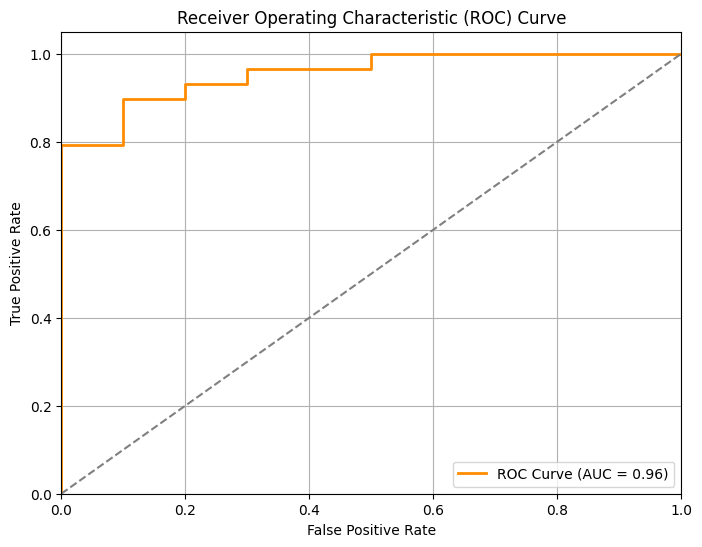

In [33]:

from sklearn.metrics import (roc_curve, auc)
#  ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:,1])

#  AUROC
roc_auc = auc(fpr, tpr)
print(f"AUROC: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import joblib

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.7, 0.9, 1.0],
    'model__colsample_bytree': [0.7, 0.9, 1.0]
}

grid = GridSearchCV(
    pipeline.set_params(model=XGBClassifier(eval_metric='logloss')),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Hyperparameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

# Save best pipeline
best_pipeline = grid.best_estimator_

joblib.dump({
    'pipeline': best_pipeline,
    'numeric_features': num_cols,
    'categorical_features': cat_cols,
    'feature_names': Feature_Names
}, "parkinsons_pipeline.joblib")

print("parkinsons_pipeline saved successfully!")



Best Hyperparameters: {'model__colsample_bytree': 0.7, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100, 'model__subsample': 1.0}
Best F1 Score: 0.9180311440024669
parkinsons_pipeline saved successfully!


🧪 Accuracy: 0.8974

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39



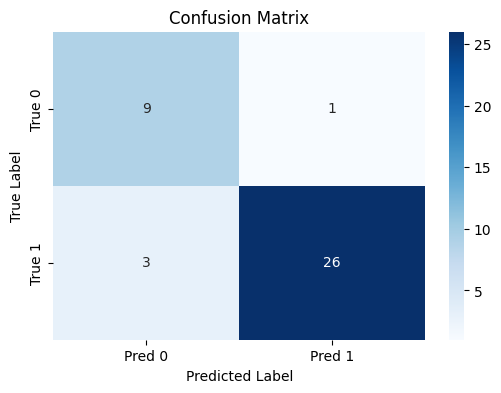


🔵 AUROC Score: 0.9379


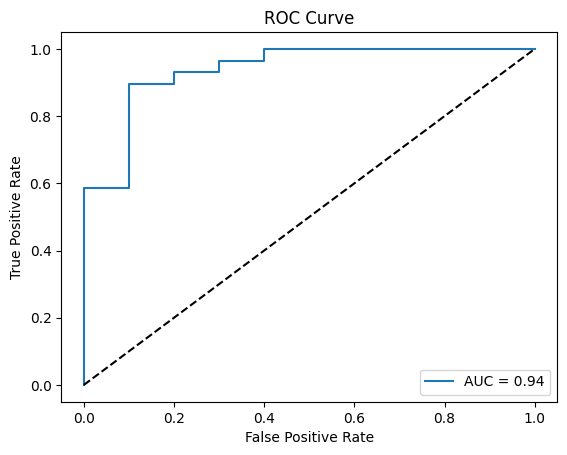

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1️⃣ Predict on Train & Test Data
# -----------------------------
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

# -----------------------------
# 2️⃣ Accuracy
# -----------------------------
Accuracy = accuracy_score(y_test, y_test_pred)

print(f"🧪 Accuracy: {Accuracy:.4f}")

# -----------------------------
# 3️⃣ Classification Report
# -----------------------------
print("\n📋 Classification Report:")
print(classification_report(y_test, y_test_pred))

# -----------------------------
# 4️⃣ Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# -----------------------------
# 5️⃣ AUROC Score
# -----------------------------
if hasattr(best_pipeline, "predict_proba"):
    y_test_proba = best_pipeline.predict_proba(X_test)[:, 1]
    auroc = roc_auc_score(y_test, y_test_proba)
    print(f"\n🔵 AUROC Score: {auroc:.4f}")

    # Optional ROC Curve Plot
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {auroc:.2f}')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("⚠️ AUROC cannot be calculated because model does not support probability predictions.")
